## ch03 선형모델 - linear model

* Machine Learning with sklearn @ DJ,Lim
* date : 20/04

* 선형회귀(linear regression)는 100여 년 전에 개발되었다.
* 선형 모델은 입력 특성에 대한 선형 함수를 만들어 예측을 수행
* 특성이 하나일 때는 직선, 두개일 때는 평면, 더 높은 차원 초평면(hyperplane)
* KnnRegressor과 비교해 보면 직선이 사용한 예측이 더 제약이 있음.
* 특성이 많은 데이터 셋이라면 선형 모델은 휼륭한 성능을 갖는다.

In [1]:
from IPython.display import display, Image

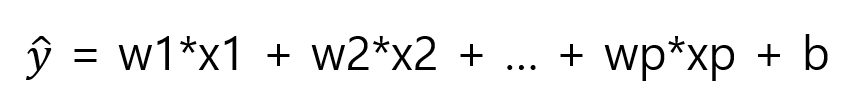

In [2]:
display(Image(filename='img/linear_model01.png'))

* x1~xp는 데이터 포인트에 대한 특성
* w와 b는 모델이 학습할 파라미터
* ^y = w1 * x1 + b 는 특성이 하나인 데이터 셋

* 선형회귀 또는 최소제곱법(OLS)은 가장 간단하고 오래된 회귀용 선형 알고리즘. 
* 선형 회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균제곱오차(mean squared error)를 최소화하는 파라미터 w와 b를 찾는다.
* 평균 제곱 오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것.

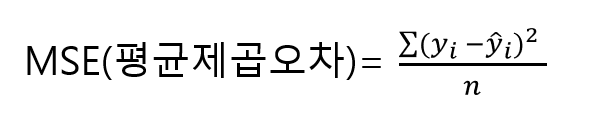

In [3]:
display(Image(filename='img/linear_model02_mse.png'))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(np.__version__)
print(matplotlib.__version__)

1.16.4
3.1.0


* mglearn은 numpy 1.16를 필요함.

In [5]:
import mglearn
import sklearn
print( sklearn.__version__)
print( mglearn.__version__)

# 설치가 안되어 있을 경우, 설치 필요.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\toto\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


0.21.2
0.1.7


C:\Users\toto\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### 01 회귀 선형 모델 그래프로 살펴보기

w[0]: 0.393906  b: -0.031804


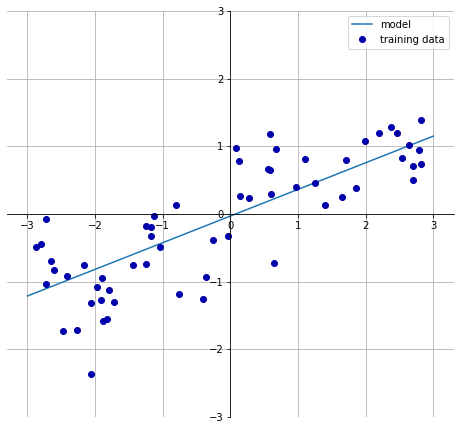

In [6]:
mglearn.plots.plot_linear_regression_wave()

### 02 Boston 데이터 셋을 활용한 회귀 모델 만들어보기
<pre>
(1) 모델 만들기 [  모델명 = 모델객체() ]
(2) 모델 학습 시키기 [ 모델명.fit() ]
(3) 모델을 활용한 예측하기 [ 모델명.predict() ]
(4) 모델 평가
</pre>

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [8]:
boston = load_boston()
X = boston.data       # 입력 데이터  - 문제
y = boston.target     # 출력 데이터  - 답

### 데이터 준비하기

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                           random_state=42)

In [10]:
model = LinearRegression().fit(X_train, y_train)   # 학습
pred = model.predict(X_test)
pred

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346,
       24.78514683, 18.66833668, -6.9788951 , 21.83575737, 19.20898992,
       26.2868054 , 20.54379176,  5.65713224, 40.42358065, 17.64146116,
       27.32258958, 30.05056174, 11.15013704, 24.11530393, 17.89145648,
       15.79348591, 22.94743453, 14.2586068 , 22.26731194, 19.24709013,
       22.26897546, 25.24344002, 25.69165643, 17.98759507, 16.70286649,
       17.11631225, 31.19643534, 20.17835831, 23.71828436, 24.79196868,
       13.94575895, 32.00389982, 42.53869791, 17.44523722, 27.15354457,
       17.07482215, 13.89272021, 26.06440323, 20.36888769, 29.97813037,
       21.35346608, 34.32287916, 15.88498671, 26.17757739, 39.50970314,
       22.84123308, 18.95049088, 32.68913818, 25.02057949, 12.90539147,
       22.76052302, 30.53884316, 31.60797905, 15.92162168, 20.50670563,
       16.50798147, 20.50202198, 26.00723901, 30.63860954, 11.42

In [11]:
import pandas as pd

In [12]:
dat = pd.DataFrame( {"y_test":y_test, "prediction":pred , "diff":y_test - pred} )
dat

,y_test,prediction,diff
0,23.6,28.838854,-5.238854
1,32.4,36.007833,-3.607833
2,13.6,15.083248,-1.483248
3,22.8,25.230909,-2.430909
4,16.1,18.878641,-2.778641
5,20.0,23.213983,-3.213983
6,17.8,17.593112,0.206888
7,14.0,14.305081,-0.305081
8,19.6,23.054390,-3.454390
9,16.8,20.620083,-3.820083


In [13]:
dat['ABS']= abs(dat['diff'])
dat['diff*diff']= dat['diff'] ** (2)
dat

,y_test,prediction,diff,ABS,diff*diff
0,23.6,28.838854,-5.238854,5.238854,27.445587
1,32.4,36.007833,-3.607833,3.607833,13.016458
2,13.6,15.083248,-1.483248,1.483248,2.200023
3,22.8,25.230909,-2.430909,2.430909,5.909318
4,16.1,18.878641,-2.778641,2.778641,7.720844
5,20.0,23.213983,-3.213983,3.213983,10.329688
6,17.8,17.593112,0.206888,0.206888,0.042802
7,14.0,14.305081,-0.305081,0.305081,0.093074
8,19.6,23.054390,-3.454390,3.454390,11.932809
9,16.8,20.620083,-3.820083,3.820083,14.593038


### 평가 지표
 * MAE(mean absolute error)
 * MSE(mean squared error)
 * RMSE(root mean squared error)

### MAE (mean absolute error)
 * 각각의 값에 절대값을 취한다. 이를 전부 더한 후, 갯수로 나누어주기

In [14]:
### MSE, MAE, RMSE, RMLSE
sum(abs(dat['diff']))/len(dat['diff'])

3.060939595437035

### MSE (mean squared error)
* (실제값-예측값) ^ 2 의 합를 데이터의 샘플의 개수로 나누어준것

In [15]:
mse_value = sum(dat['diff'] ** 2) / len(dat['diff'])
mse_value

22.098694827098043

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mean_squared_error(y_test, pred)

22.098694827098036

### RMSE (root mean squared error)
* (실제값-예측값) ^ 2 의 합을 데이터의 샘플의 개수로 나누어 준 이후에 제곱근 씌우기

In [18]:
# (1) 제곱에 루트를 씌워구하기  (2) 제곱한 값을 길이로 나누기
result = np.sqrt(mse_value)
print(result)

4.700924890603767


### 결정계수
 * 통계학에서 선형모형이 주어진 자료에 적합도를 재는 척도

In [19]:
# R^2의 값을 구하기- 결정계수 구하기
print("훈련 데이터 세트 점수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(model.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.75
테스트 데이터 세트 점수 : 0.68


### 실습 과제 1
* 아래 대회에서 데이터 셋을 다운로드 후, 다중선형 회귀 모델을 만들어보자.
   * URL : https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/data
* MAE, MSE, RMSE를 구해보자

### 도전
* 다중 선형 회귀 모델을 만들고 이를 예측을 수행한 후, 제출해 보자.